In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [2]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import load_dir

In [3]:
Year = "2019"
Month = "09"
Day = "17"
BeadNumber = 1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [4]:
folder =  r"/home/data_transfer/data_from_windows/" + Year + Month + Day +"/Bead"+str(BeadNumber)+"/Shaking/"
files = load_dir(folder, file_prefix = 'Shaking', max_file=500)

28  files in folder
28  files loaded


In [5]:
files_bkg = load_dir(folder, file_prefix = 'NoBeadShaking', max_file=500)

11  files in folder
11  files loaded


In [6]:
frequency = 13
no_of_harmonics = 50
fsamp=5000

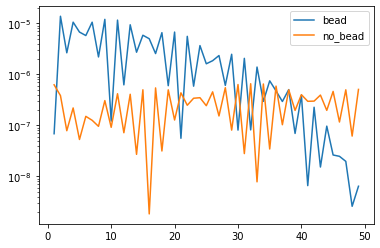

In [7]:
data=files[27].xyz2
data_bkg=files_bkg[10].xyz2
data_det=signal.detrend(data)
data_bkg_det=signal.detrend(data_bkg)
res = 5000#len(data[0])
xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
xpsd_b, freqs_b = matplotlib.mlab.psd(data_bkg_det[0], Fs = fsamp, NFFT = res)

freqs_list = []
psdx_list = []
freqs_b_list = []
psdx_b_list = []

for j in np.arange(1,no_of_harmonics):
    freqs_list.append(freqs[frequency*j]/13)
    psdx_list.append(xpsd[frequency*j])
    freqs_b_list.append(freqs_b[frequency*j]/13)
    psdx_b_list.append(xpsd_b[frequency*j])

plt.plot(freqs_list,psdx_list, label = "bead")
plt.plot(freqs_b_list,psdx_b_list, label = "no_bead")
plt.legend()
plt.yscale("log")
plt.show()

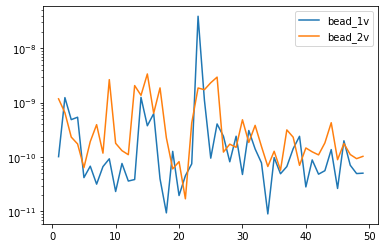

In [8]:
data=files[13].xyz2
data_bkg=files[14].xyz2
data_det=signal.detrend(data)
data_bkg_det=signal.detrend(data_bkg)
res = 5000#len(data[0])
xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
xpsd_b, freqs_b = matplotlib.mlab.psd(data_bkg_det[0], Fs = fsamp, NFFT = res)

freqs_list = []
psdx_list = []
freqs_b_list = []
psdx_b_list = []

for j in np.arange(1,no_of_harmonics):
    freqs_list.append(freqs[frequency*j]/13)
    psdx_list.append(xpsd[frequency*j])
    freqs_b_list.append(freqs_b[frequency*j]/13)
    psdx_b_list.append(xpsd_b[frequency*j])

plt.plot(freqs_list,psdx_list, label = "bead_1v")
plt.plot(freqs_b_list,psdx_b_list, label = "bead_2v")
plt.legend()
plt.yscale("log")
plt.show()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 

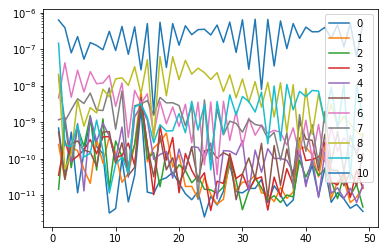

In [9]:
for i in np.arange(0,len(files_bkg)):
    #res=50000
    data=files_bkg[i].xyz2
    data_det=signal.detrend(data)
    res = 5000#len(data[0])
    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
    freqs_list = []
    psdx_list = []
    for j in np.arange(1,no_of_harmonics):
        freqs_list.append(freqs[frequency*j]/13)
        psdx_list.append(xpsd[frequency*j])
    plt.plot(freqs_list,psdx_list, label ="%d" %i)
    print(freqs_list)
plt.yscale("log")   
plt.legend()
plt.show()    

In [10]:
distances = [55,35,23,17,14,6] # distances sampled in micrometer
file_1v_bead = [8,14,22,24,26,28]
file_1v_no_bead = [1,3,5,7,9,11]
file_2v_bead = [9,15,23,25,27] 
file_2v_no_bead = [2,4,6,8,10]

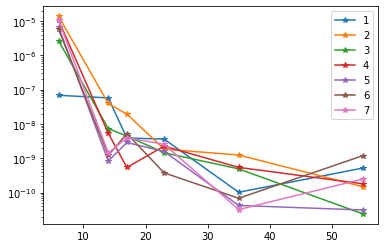

In [13]:
frequency=13
for harmonic in np.arange(1,8,1):
    signal_list_1v = []
    for meas in file_1v_bead:
        data=files[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        signal_list_1v.append(xpsd[frequency*harmonic])
    plt.plot(distances,signal_list_1v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

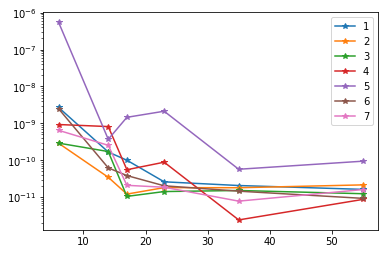

In [15]:
frequency=21
for harmonic in np.arange(1,8,1):
    signal_list_1v = []
    for meas in file_1v_bead:
        data=files[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        signal_list_1v.append(xpsd[frequency*harmonic])
    plt.plot(distances,signal_list_1v,marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

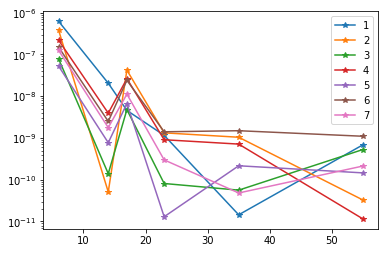

In [16]:
frequency=13
for harmonic in np.arange(1,8,1):
    bkg_list_1v = []
    for meas in file_1v_no_bead:
        data=files_bkg[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        bkg_list_1v.append(xpsd[frequency*harmonic])
    plt.plot(distances,bkg_list_1v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

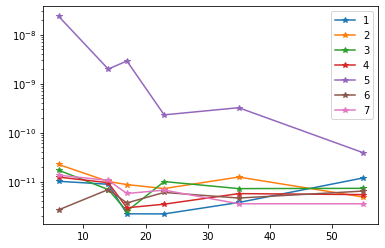

In [17]:
frequency=21
for harmonic in np.arange(1,8,1):
    bkg_list_1v = []
    for meas in file_1v_no_bead:
        data=files_bkg[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        bkg_list_1v.append(xpsd[frequency*harmonic])
    plt.plot(distances,bkg_list_1v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

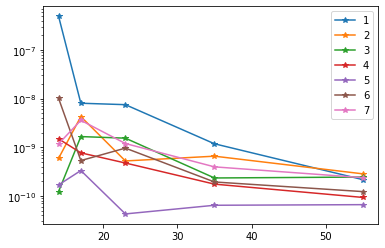

In [18]:
frequency=13
for harmonic in np.arange(1,8,1):
    signal_list_2v = []
    for meas in file_2v_bead:
        data=files[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        signal_list_2v.append(xpsd[frequency*harmonic])
    plt.plot(distances[:-1],signal_list_2v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

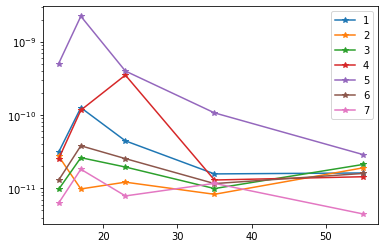

In [19]:
frequency=21
for harmonic in np.arange(1,8,1):
    signal_list_2v = []
    for meas in file_2v_bead:
        data=files[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        signal_list_2v.append(xpsd[frequency*harmonic])
    plt.plot(distances[:-1],signal_list_2v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

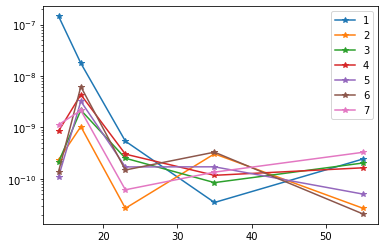

In [20]:
frequency=13
for harmonic in np.arange(1,8,1):
    bkg_list_2v = []
    for meas in file_2v_no_bead:
        data=files_bkg[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        bkg_list_2v.append(xpsd[frequency*harmonic])
    plt.plot(distances[:-1],bkg_list_2v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

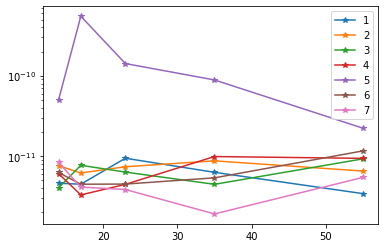

In [21]:
frequency=21
for harmonic in np.arange(1,8,1):
    bkg_list_2v = []
    for meas in file_2v_no_bead:
        data=files_bkg[meas-1].xyz2
        data_det=signal.detrend(data)
        res = 5000#len(data[0])
        xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
        bkg_list_2v.append(xpsd[frequency*harmonic])
    plt.plot(distances[:-1],bkg_list_2v, marker="*",label = "%d"%harmonic)
plt.legend()
plt.yscale("log")
plt.show()

In [26]:
def fft_norm(N, fsamp):
    return np.sqrt(2 / (N * fsamp))

In [54]:
xpsd, freqs = matplotlib.mlab.psd(files_bkg[1].xyz2[0], Fs = fsamp, NFFT = 5000)#len(files_bkg[1].xyz2[0]))


In [55]:
fft_0 = np.fft.rfft(files_bkg[1].xyz2[0],5000)
fft_1 = np.abs(fft_0)
freq2 = np.fft.rfftfreq(5000, d=1./5000)
psd_dat2 = fft_1*fft_1.conj().real*fft_norm(len(files_bkg[1].xyz2[0]),5000)**2
    

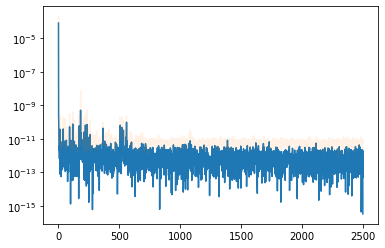

In [56]:
plt.plot(freq2,psd_dat2)
plt.plot(freqs,xpsd, alpha =0.1)
plt.yscale("log")

In [112]:
fft = np.fft.fft(files_bkg[8].xyz2[0],5000)


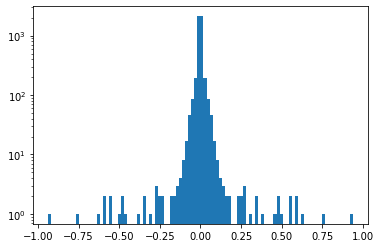

In [113]:
plt.hist(np.imag(fft),bins=100)
plt.yscale("log")

(array([[1.000e+00, 1.000e+00, 4.000e+00, 1.000e+01, 2.484e+03, 2.483e+03,
         1.000e+01, 4.000e+00, 1.000e+00, 1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

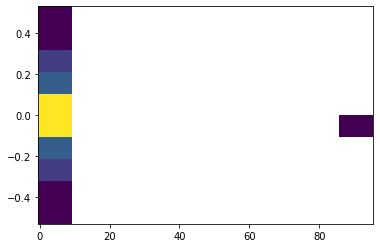

In [111]:
plt.hist2d(np.real(fft),np.imag(fft),norm=matplotlib.colors.LogNorm())